In [156]:
from analyse_logs import *

op_df = get_op_df(log_path)
op_df


opid: 101 req
opid: 102 req
opid: 103 req
opid: 104 req
opid: 105 req
opid: 106 req


,opid,method,reply_received,params,start_time,result,end_time,time
0,101,discv5_registerTopic,False,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653953434,NaN,NaN,NaN
1,102,discv5_registerTopic,False,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653953530,NaN,NaN,NaN
2,103,discv5_registerTopic,False,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653953642,NaN,NaN,NaN
3,104,discv5_topicSearch,True,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653963655,[480f6ff3428c87081bc0720bd21ad93521610543de3a8...,1.665654e+12,22.0
4,105,discv5_topicSearch,True,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653963657,[277533ea2e875fa773c60be4db08413bfb2eefb01c390...,1.665654e+12,22.0
5,106,discv5_topicSearch,True,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653963658,[480f6ff3428c87081bc0720bd21ad93521610543de3a8...,1.665654e+12,21.0


<AxesSubplot:title={'center':'Operation returned'}, ylabel='reply_received'>

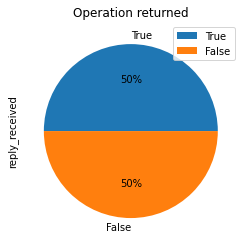

In [157]:
op_df['reply_received'].value_counts().plot(kind = 'pie', autopct='%1.0f%%', legend=True, title='Operation returned')

<AxesSubplot:xlabel='method', ylabel='time'>

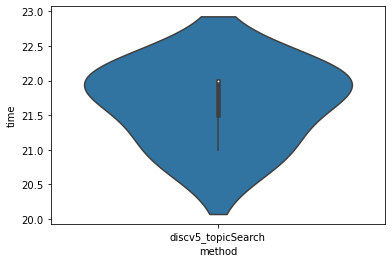

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()
df = op_df[~op_df['time'].isna()]
df
sns.violinplot(x='method',y='time', data=df, ax = axes)
#axes.set_title('Day Ahead Market')

In [159]:
from analyse_logs import *

msg_df = get_msg_df(log_path)
msg_df

Reading node-9.log
Reading node-1.log
Reading node-7.log
Reading node-3.log
Reading node-6.log
Reading node-4.log
Reading node-8.log
Reading node-10.log
Reading node-5.log
Reading node-2.log


,node_id,peer_id,in_out,timestamp,msg_type,req_id,key,opid
0,9,1,out,2022-10-13 10:39:10.491216+01:00,FINDNODE/v5,0xa8a76aa1df0dea2d,NaN,NaN
1,9,1,in,2022-10-13 10:39:10.491289+01:00,WHOAREYOU/v5,NaN,NaN,NaN
2,9,1,out,2022-10-13 10:39:10.491649+01:00,FINDNODE/v5,0xa8a76aa1df0dea2d,NaN,NaN
3,9,1,in,2022-10-13 10:39:10.492038+01:00,NODES/v5,0xa8a76aa1df0dea2d,NaN,NaN
4,9,1,in,2022-10-13 10:39:10.492093+01:00,NODES/v5,0xa8a76aa1df0dea2d,NaN,NaN
...,...,...,...,...,...,...,...,...
4470,2,4,in,2022-10-13 10:39:45.783229+01:00,NODES/v5,0xade5c06b4bf77cce,NaN,NaN
4471,2,4,in,2022-10-13 10:39:45.783315+01:00,NODES/v5,0xade5c06b4bf77cce,NaN,NaN
4472,2,9,in,2022-10-13 10:39:45.783442+01:00,NODES/v5,0x2f7ea09b69cb2422,NaN,NaN
4473,2,9,in,2022-10-13 10:39:45.783556+01:00,NODES/v5,0x2f7ea09b69cb2422,NaN,NaN


In [160]:
#set the missing opids and op_types to all the messages being part of operations
for opid in set([i for i in op_df['opid']]):
    op_type = op_df.loc[op_df['opid'] == opid, 'method'].values[0]
    for req_id in set([i for i in msg_df[msg_df['opid'] == opid]['req_id']]):
        msg_df.loc[msg_df["req_id"] == req_id, "opid"] = opid
        msg_df.loc[msg_df['req_id'] == req_id, 'op_type'] = op_type

msg_df = msg_df.dropna(subset=['opid'])
msg_df

,node_id,peer_id,in_out,timestamp,msg_type,req_id,key,opid,op_type
105,9,1,in,2022-10-13 10:39:13.540506+01:00,FINDNODE/v5,0x3f34bad036752570,NaN,102.0,discv5_registerTopic
106,9,1,out,2022-10-13 10:39:13.540681+01:00,NODES/v5,0x3f34bad036752570,NaN,102.0,discv5_registerTopic
107,9,1,out,2022-10-13 10:39:13.540784+01:00,NODES/v5,0x3f34bad036752570,NaN,102.0,discv5_registerTopic
108,9,1,out,2022-10-13 10:39:13.540871+01:00,NODES/v5,0x3f34bad036752570,NaN,102.0,discv5_registerTopic
109,9,1,in,2022-10-13 10:39:13.547102+01:00,REGTOPIC/v5,0x147e3a18f6f997c8,1.0,102.0,discv5_registerTopic
...,...,...,...,...,...,...,...,...,...
4470,2,4,in,2022-10-13 10:39:45.783229+01:00,NODES/v5,0xade5c06b4bf77cce,NaN,103.0,discv5_registerTopic
4471,2,4,in,2022-10-13 10:39:45.783315+01:00,NODES/v5,0xade5c06b4bf77cce,NaN,103.0,discv5_registerTopic
4472,2,9,in,2022-10-13 10:39:45.783442+01:00,NODES/v5,0x2f7ea09b69cb2422,NaN,103.0,discv5_registerTopic
4473,2,9,in,2022-10-13 10:39:45.783556+01:00,NODES/v5,0x2f7ea09b69cb2422,NaN,103.0,discv5_registerTopic


discv5_registerTopic
	 discv5_registerTopic
		 FINDNODE/v5 270
		 NODES/v5 538
		 REGCONFIRMATION/v5 18
		 REGTOPIC/v5 18
	 discv5_registerTopic
		 FINDNODE/v5 306
		 NODES/v5 668
		 REGCONFIRMATION/v5 18
		 REGTOPIC/v5 18
	 discv5_registerTopic
		 FINDNODE/v5 306
		 NODES/v5 670
		 REGCONFIRMATION/v5 18
		 REGTOPIC/v5 18
discv5_topicSearch
	 discv5_topicSearch
		 FINDNODE/v5 18
		 NODES/v5 42
		 TOPICQUERY/v5 4
	 discv5_topicSearch
		 FINDNODE/v5 18
		 NODES/v5 42
		 TOPICQUERY/v5 4
	 discv5_topicSearch
		 FINDNODE/v5 21
		 NODES/v5 46
		 TOPICQUERY/v5 4


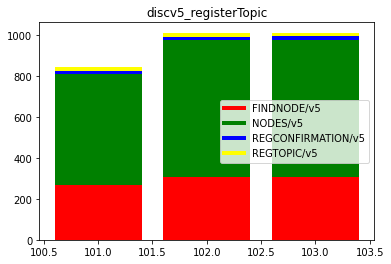

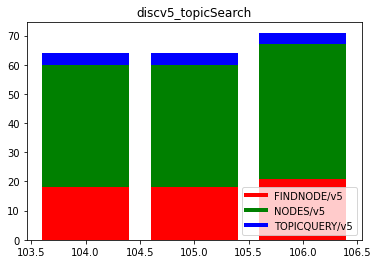

In [184]:
from matplotlib.lines import Line2D

colors = ['red', 'green', 'blue', 'yellow']
for op_type, group_op_type in msg_df.groupby('op_type'):
    #if(op_type != 'discv5_registerTopic'):
        #continue
    print(op_type)
    fig, ax = plt.subplots()
    legend_elements = []
    added = set()
    for opid, group_opid in group_op_type.groupby('opid'):
        print("\t", op_type)
        i = 0
        sum = 0
        for msg_type, group_msg_type in group_opid.groupby('msg_type'):
            val = len(group_msg_type)
            ax.bar(opid, val, color=colors[i], bottom = sum)
            sum += val
            print("\t\t", msg_type, len(group_msg_type))
            if(msg_type not in added):
                added.add(msg_type)
                legend_elements.append(Line2D([0], [0], color=colors[i], lw=4, label=msg_type))
            i += 1
    ax.legend(handles=legend_elements)
    ax.set_title(op_type)
plt.show()

<AxesSubplot:title={'center':'Msgs sent/received'}, ylabel='in_out'>

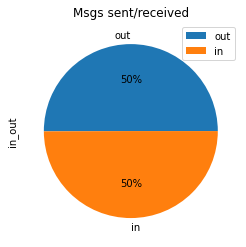

In [162]:
msg_df['in_out'].value_counts().plot(kind='pie', autopct='%1.0f%%', legend=True, title='Msgs sent/received')

Text(0, 0.5, '#Messages')

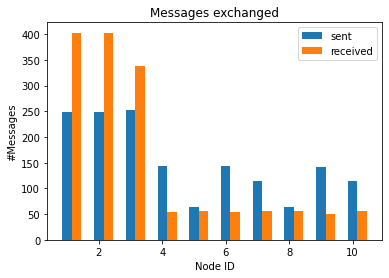

In [163]:
import matplotlib.pyplot as plt

sent = msg_df[msg_df['in_out'] == 'out']['node_id'].value_counts().to_dict()
sent = {int(k):int(v) for k,v in sent.items()} #convert IDs to int
received = msg_df[msg_df['in_out'] == 'in']['node_id'].value_counts().to_dict()
received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(sent.keys(), sent.values(), width=width, label = 'sent')
plt.bar([x + width for x in received.keys()], received.values(), width=width, label = 'received')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Node ID')
plt.ylabel('#Messages')

<AxesSubplot:xlabel='in_out', ylabel='count'>

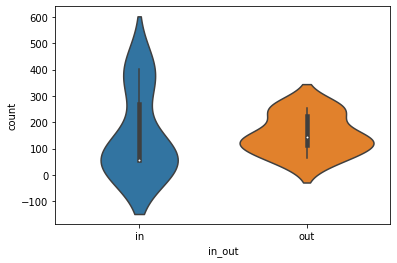

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()
df_in = msg_df[msg_df['in_out']=='in']['node_id'].value_counts().rename_axis('node_id').reset_index(name='count')
df_in['in_out'] = 'in'
df_out = msg_df[msg_df['in_out']=='out']['node_id'].value_counts().rename_axis('node_id').reset_index(name='count')
df_out['in_out'] = 'out'

df = pd.concat([df_in, df_out], axis=0)
sns.violinplot(x='in_out', y='count', data=df, ax = axes)

<AxesSubplot:>

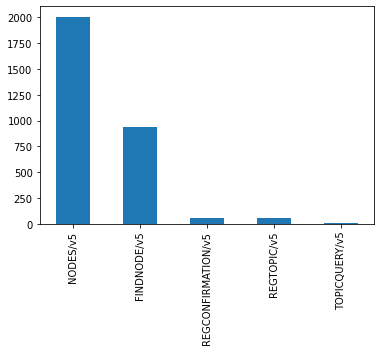

In [165]:
msg_df['msg_type'].value_counts().plot(kind='bar')

Text(0, 0.5, '#Messages')

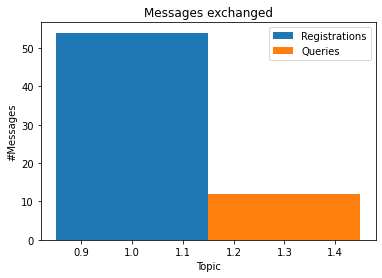

In [166]:
import numpy as np
import math
import hashlib

df2 = msg_df.dropna()
regs = df2[df2['msg_type'] == 'REGTOPIC/v5']['key'].value_counts().to_dict()
#regs = {int(k):int(v) for k,v in sent.items()} #convert IDs to int
queries = df2[df2['msg_type'] == 'TOPICQUERY/v5']['key'].value_counts().to_dict()
#received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(regs.keys(), regs.values(), width=width, label = 'Registrations')
plt.bar([x + width for x in queries.keys()], queries.values(), width=width, label = 'Queries')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Topic')
plt.ylabel('#Messages')

